In [6]:
# 본인 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Lab 5: NumPy and Image Processing (Part 1!)


## Warming Up

### Creating ndarrays


Numpy 라이브러리를 이용하여 ndarray를 생성하는 데 사용되는 함수를 살펴보는 것으로 시작합니다.

In [7]:
import numpy as np

A = np.array([[1, 2], [3, 4], [5, 6]])
print(A)

[[1 2]
 [3 4]
 [5 6]]


In [ ]:
B = np.random.random((3, 2))
print(B)

[[0.51633944 0.34891278]
 [0.190807   0.06573941]
 [0.87105476 0.50219531]]


In [4]:
C = np.linspace(2, 10, 15)                 # Arguments: np.linspace(start, end, num_elements)
print(C)
print(C.shape)

[ 2.          2.57142857  3.14285714  3.71428571  4.28571429  4.85714286
  5.42857143  6.          6.57142857  7.14285714  7.71428571  8.28571429
  8.85714286  9.42857143 10.        ]
(15,)


In [5]:
C = np.linspace(2, 10, 9)                 # Arguments: np.linspace(start, end, num_elements)
print(C)
print(C.shape)

[ 2.  3.  4.  5.  6.  7.  8.  9. 10.]
(9,)


In [ ]:
D = np.full((2, 5), True)
print(D)

[[ True  True  True  True  True]
 [ True  True  True  True  True]]


In [ ]:
E = np.zeros((2, 5))
print(E)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


### `array` vs. `asarray`


두 함수는 같은 방식으로 ndarray를 구성하는 것처럼 보이지만 한 가지 차이점이 존재합니다.<br/>아래 예제를 통해 차이점을 확인해보겠습니다.

In [ ]:
arr = np.ones((3, 2))
A = np.array(arr) # create new array
print(A.shape)
A[0, 0] = -1
print(arr)
print(A)
print()

arr = np.ones((3, 2))
A = np.asarray(arr) # point to arr
A[0, 0] = -1
print(arr)
print(A)

(3, 2)
[[1. 1.]
 [1. 1.]
 [1. 1.]]
[[-1.  1.]
 [ 1.  1.]
 [ 1.  1.]]

[[-1.  1.]
 [ 1.  1.]
 [ 1.  1.]]
[[-1.  1.]
 [ 1.  1.]
 [ 1.  1.]]


## Instagram Filters


아래 함수는 이미지를 구성하는 Numpy 배열을 가져오고 필터링된 Numpy 배열을 반환합니다.<br/>필터는 함수를 구현하는 셀 위의 Markdown 셀에 명시되어 있습니다.<br/>아래 예제를 통해 명시된 필터를 이미지에 적용하고 Numpy 인덱싱에 대해 알아보도록 합니다.

In [15]:
# Run this cell which contains functions to extract NumPy representations of images and save NumPy arrays as images.
#이미지의 Numpy representations 을 추출하고 Numpy 배열을 이미지로 저장하는 함수가 포함된 셀을 실행합니다.
# You do not need to edit anything in this file.  [제거]
from PIL import Image

def load_image( infilename ) :
    img = Image.open(infilename)
    # img.load()
    data = np.asarray(img)
    print(data.shape)
    return data

def save_image( npdata, outfilename ) :
    img = Image.fromarray(npdata.astype('uint8'))
    img.save(outfilename)



원본 이미지 (Parth, Sam and Michael) : 
<img src="attachment:cs41img.png" style="width: 300px;"/>



```crop_img```: 선택한 이미지 뷰어/편집기에서 실습 노트북 디렉토리에 존재하는 cs41img.png 를 엽니다.

Parth의 얼굴 주위에 직사각형을 형성하는 픽셀의 대략적인 위치를 추측합니다. <br/>입력 Numpy 배열 `img`를 슬라이스하여 출력 Numpy 배열이 Parth의 얼굴만을 포함하는 일부의 이미지를 나타내도록 합니다.

최종적으로 출력된 이미지는 다음과 같습니다.
    <img src="attachment:SOLcs41img_cropped.png" style="width: 300px;"/>

아래의 셀을 실행하여 결과를 확인하고 수정된 이미지를 저장하도록 합니다.

In [16]:
def crop_img(img):
	img = img[250:800, 100:450, :]
	return img
img = load_image("/content/drive/MyDrive/Colab Notebooks/Data Mining/02/cs41img.png").copy()
# save_image(crop_img(img), "/content/drive/MyDrive/Colab Notebooks/Data Mining/02/cs41img_cropped.png")


(1844, 1240, 3)


255
0


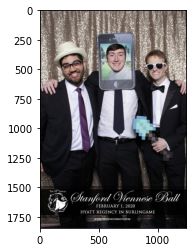

In [48]:
import matplotlib.pyplot as plt
print(img.max())
print(img.min())
plt.imshow(img)
plt.show()



`green_img` : 반환된 Numpy 배열이 원본 이미지의 녹색 채널만 포함하는 이미지를 나타내도록 입력 Numpy 배열 `img` 를 슬라이스합니다.

* 중요 사항<br/>
  1. 입력 이미지의 치수는 (M, N, 3)
  2. 출력 Numpy 배열 차원 (M, N, 3)
  3. 빨간색/파란색 채널은 0으로 조정<br/>

(M, N, 1) Numpy 배열을 반환하면 PIL은 이미지의 녹색 채널로만 해석하지 않고 흑백 사진으로 재구성합니다.

* 힌트
  1. `np.stack` 함수를 사용하여 여러 채널을 쌓을 수 있습니다.

(M, N) 행렬의 튜플에 전달되면 새 축을 따라 연결하여 (M, N, 2) 행렬을 만듭니다.

<br/>출력 이미지 : 
    <img src="attachment:SOLcs41img_green.png" style="width: 300px;"/>

In [ ]:
def green_img(img):
	img = img[:, :, 1]
	zeros = np.zeros(img.shape)
	img = np.stack((zeros, img, zeros), axis=2)
	return img

img = load_image("/content/drive/MyDrive/Colab Notebooks/Data Mining/02/cs41img.png").copy()
save_image(green_img(img), "/content/drive/MyDrive/Colab Notebooks/Data Mining/02/cs41img_green.png")


`third_third_third` : 앞의 두 예제에서 사용된 방법을 활용하여 다음을 세 가지를 만족하는 이미지를 만듭니다.

1. 상단 1/3은 빨간색 채널만 포함
2. 중간 1/3은 파란색 채널만 포함
3. 하단 1/3은 녹색 채널만 포함

* 힌트
1. `np.stack` 을 사용하는 것 외에도 `np.concatenate` 를 사용할 수 있습니다.

Numpy 배열의 튜플과 축 인수를 전달하면 지정된 축을 따라 연결된 튜플의 Numpy 배열로 구성된 Numpy 배열이 반환됩니다.

<br/>출력 이미지 : 
    <img src="attachment:SOLcs41img_third.png" style="width: 300px;"/>

(614, 1240)


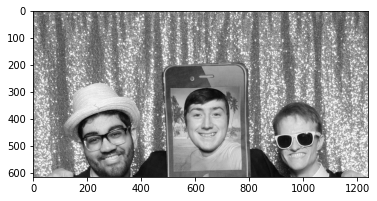


(615, 1240)


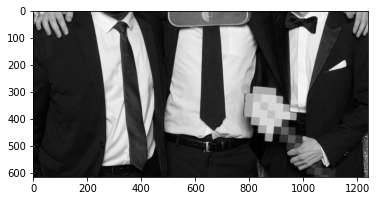


(615, 1240)


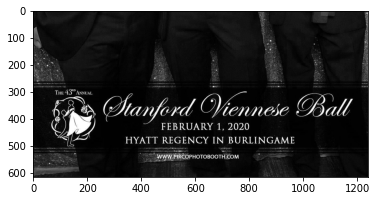

In [28]:
red = img[:int(img.shape[0]/3), :, 0]
print(red.shape)
plt.imshow(red, cmap="gray")
plt.show()
print()

green = img[int(img.shape[0]/3):int(2*img.shape[0]/3), :, 1]
print(green.shape)
plt.imshow(green, cmap="gray")
plt.show()
print()

blue = img[int(2*img.shape[0]/3):, :, 2]
print(blue.shape)
plt.imshow(blue, cmap="gray")
plt.show()
print()

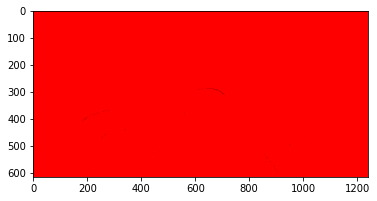

(614, 1240, 3)



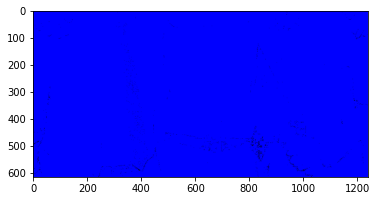

(615, 1240, 3)



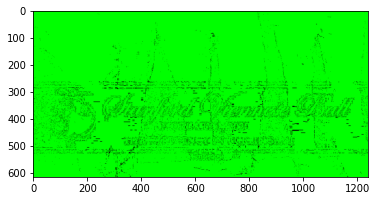

(615, 1240, 3)



In [29]:
red = np.stack((red, np.zeros(red.shape), np.zeros(red.shape)), axis=2)
plt.imshow(red)
plt.show()
print(red.shape)
print()

green = np.stack((np.zeros(green.shape), np.zeros(green.shape), green), axis=2)
plt.imshow(green)
plt.show()
print(green.shape)
print()

blue = np.stack((np.zeros(blue.shape), blue, np.zeros(blue.shape)), axis=2)
plt.imshow(blue)
plt.show()
print(blue.shape)
print()

(1, 1240, 3)

(615, 1240, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
(1845, 1240, 3)



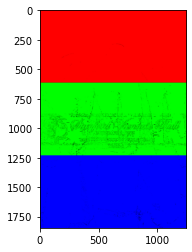

In [47]:
tmp = np.zeros((1,red.shape[1],3))
print(tmp.shape)
print()

red_tmp = np.concatenate((red, tmp))
print(red_tmp.shape)

st = np.concatenate((red_tmp, blue, green), axis=0)
print(st.shape)
print()

plt.imshow(st)
plt.show()

In [ ]:
def third_third_third(img):
	red = img[:int(img.shape[0]/3), :, 0]
	green = img[int(img.shape[0]/3):int(2*img.shape[0]/3), :, 1]
	blue = img[int(2*img.shape[0]/3):, :, 2]

	red = np.stack((red, np.zeros(red.shape), np.zeros(red.shape)), axis=2)
	green = np.stack((np.zeros(green.shape), np.zeros(green.shape), green), axis=2)
	blue = np.stack((np.zeros(blue.shape), blue, np.zeros(blue.shape)), axis=2)

	return np.concatenate((red, green, blue), axis=0)

img = load_image("cs41img.png").copy()
save_image(third_third_third(img), "cs41img_third.png")

다음 두 함수는 실제 애플리케이션에서 사용되고 있는 이미지 편집 알고리즘입니다.

`brightness` : 이미지를 나타내는 Numpy 배열 외에도 하나의 요소를 취합니다. 이미지 배열의 모든 요소에 주어진 인수를 곱하여 이미지의 밝기를 조정할 수 있습니다. 이러한 과정의 결과 값이 255보다 큰 요소가 있으면 해당 픽셀 값을 255로 설정합니다 그 후, 다음 밝은 이미지를 나타내는 Numpy 배열을 반환합니다.

`brightness` 함수가 아래 (1.5)에서 사용하는 요소를 호출하게 되면 출력 이미지는 다음과 같습니다.
    <img src="attachment:SOLcs41img_bright.png" style="width: 300px;"/>

또한, 구현에 따라 `brightness` 를 실행하는 데 1분 이상의 시간이 소요될 수 있습니다.

In [64]:
count = 0
tmp = np.random.randn(32,32,3)
print(tmp[0,0,0])
print(tmp[0,0,1])

with np.nditer(tmp, op_flags=['readwrite']) as it:
    print(type(it))
    for elem in it:
        if count == 10:
            break
        print('elem[...]:',elem[...])
        print('elem:',elem)
        count += 1
  
print(count)
    #     elem[...] = min(elem*factor, 255)

# print(tmp.shape)
# print()

-0.026481952683079537
-0.9617798812185204
<class 'numpy.nditer'>
elem[...]: -0.026481952683079537
elem: -0.026481952683079537
elem[...]: -0.9617798812185204
elem: -0.9617798812185204
elem[...]: 0.6584507980473793
elem: 0.6584507980473793
elem[...]: 1.549236805889297
elem: 1.549236805889297
elem[...]: 0.6815804945034609
elem: 0.6815804945034609
elem[...]: -0.7393572039126353
elem: -0.7393572039126353
elem[...]: -0.1879473421044586
elem: -0.1879473421044586
elem[...]: -0.9121623332125331
elem: -0.9121623332125331
elem[...]: 0.4931458812261266
elem: 0.4931458812261266
elem[...]: -1.0611930385179096
elem: -1.0611930385179096
10


(1844, 1240, 3)
<class 'numpy.ndarray'>
255
0


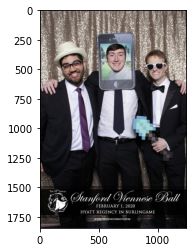

255
0


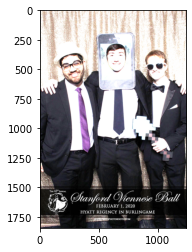

In [54]:
def brightness(img, factor):
    with np.nditer(img, op_flags=['readwrite']) as it:
        for elem in it:
            elem[...] = min(elem*factor, 255)
    return img

img = load_image("/content/drive/MyDrive/Colab Notebooks/Data Mining/02/cs41img.png").copy()
print(type(img))
print(img.max())
print(img.min())
plt.imshow(img)
plt.show()

bright_image = brightness(img, 1.5)
print(bright_image.max())
print(bright_image.min())
plt.imshow(brightness(img, 1.5))
plt.show()
# save_image(brightness(img, 1.5), "cs41img_bright.png")

`brightness_PIL` : 많은 이미지 처리 작업의 경우 Numpy가 항상 최고의 성능을 가져오지는 않습니다.

파이썬의 이미지 처리 라이브러리를 사용하여 계산 시간을 단축할 수 있을지 생각해봅니다.

`PIL` 에 포함된 `Image.point()` 함수는 람다(하나의 인수를 취함)를 받은 다음 해당 람다를 이미지의 각 지점 (R, G, B)에 적용합니다.

위 예제에서 구현한 `brightness` 함수와 동일한 효과를 얻기 위해 `brightness_PIL` 을 어떻게 구현해야할지 생각해봅니다.

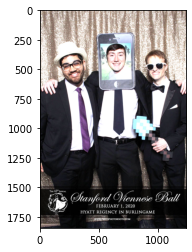

In [66]:
def brightness_PIL(img, factor):
    img = img.point(lambda p: min(p*factor, 255))
    return img

img = brightness_PIL(Image.open("/content/drive/MyDrive/Colab Notebooks/Data Mining/02/cs41img.png"), 1.5)
plt.imshow(img)
plt.show()

`contrast` : 이 함수는 `brightness` 와 유사한 방식이지만 한 가지 중요한 차이점이 존재합니다.

Numpy 배열에서 주어진 요소의 값이 128보다 작으면 값을 주어진 인수로 나누어 값을 업데이트합니다.<br/>
요소의 값이 128보다 크면 주어진 인수를 곱하여 값을 업데이트 합니다.

이러한 방식으로 요소가 허용 가능한 범우의 중간 값보다 크거나 작은지 여부에 따라 요소 간에 더 큰 차이를 만듭니다.

<br/>위 함수를 통한 출력 이미지는 다음과 같습니다.
<img src="attachment:SOLcs41img_contrast.png" style="width: 300px;"/>

또한, 구현에 따라 `contrast` 를 살행하는 데 1분 이상이 소요될 수 있습니다.

(1844, 1240, 3)


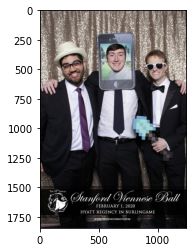

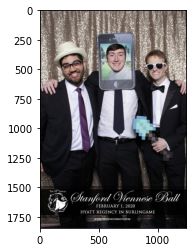

In [71]:
## [...]를 붙이지 않으면 img가 아예 바뀌지 않는다.
def contrast(img, factor):
    with np.nditer(img, op_flags=['readwrite']) as it:
        for elem in it:
            elem[...] = min(elem*factor, 255)
            if elem < 128:
                elem[...] = elem/factor
            else:
                elem[...] = min(elem*factor, 255)

    return img

img = load_image("/content/drive/MyDrive/Colab Notebooks/Data Mining/02/cs41img.png").copy()
plt.imshow(img)
plt.show()

plt.imshow(contrast(img,1.5))
plt.show()

## Image Reconstruction
각 사진에는 Parth, Sam 또는 Michael 중 하나의 얼굴이 가려져 있습니다. (아래 세 개의 이미지를 참조하세요.)
<img src="attachment:SOLcs41img_unicorn1.png" style="width: 300px;"/>
<img src="attachment:SOLcs41img_unicorn2.png" style="width: 300px;"/>
<img src="attachment:SOLcs41img_unicorn3.png" style="width: 300px;"/>

아래의 `reconstruct` 함수는 각 이미지를 나타내는 3개의 Numpy 배열을 사용합니다.

`reconstruct` 함수가 Unicornelius 없이 Parth, Sam 및 Michael의 이미지를 반환하도록 알고리즘을 재구성합니다.

최종 이미지는 아래와 같습니다.
<img src="attachment:cs41img.png" style="width: 300px;"/>



In [ ]:
def reconstruct(img1, img2, img3):
    with np.nditer(img1, op_flags=['readwrite'], flags=['multi_index']) as it:
        for elem in it:
            pixel_choices = np.asarray([img1[it.multi_index], img2[it.multi_index], img3[it.multi_index]])

            elem[...] = np.argmax(np.bincount(pixel_choices))

    return img1

img1 = load_image("/content/drive/MyDrive/Colab Notebooks/Data Mining/02/SOLcs41img_unicorn1.png").copy()
img2 = load_image("/content/drive/MyDrive/Colab Notebooks/Data Mining/02/SOLcs41img_unicorn2.png").copy()
img3 = load_image("/content/drive/MyDrive/Colab Notebooks/Data Mining/02/SOLcs41img_unicorn3.png").copy()

reconstruct(img1, img2, img3)
# save_image(reconstruct(img1, img2, img3), "cs41img_reconstructed.png")

In [ ]:
import numpy as np

dim = 2
x = np.random.randn(dim,dim)+128
y = np.random.randn(dim,dim)+128
z = np.random.randn(dim,dim)+128


def reconstruct(img1, img2, img3):
    with np.nditer(img1, op_flags=['readwrite'], flags=['multi_index']) as it:
        for elem in it:
            print(it.multi_index)
            print(elem)
            pixel_choices = np.asarray([img1[it.multi_index], img2[it.multi_index], img3[it.multi_index]])
            print(pixel_choices)
            
            tmp = np.bincount(pixel_choices)
            print(type(tmp))
            print(len(tmp))
            elem[...] = np.argmax(tmp)
            print()

    return img1

x = x.astype("int32")
print(x)
y = y.astype("int32")
print(y)
z = z.astype("int32")
print(z)
print()
reconstruct(x,y,z)
print()
print(x)
print()
print(y)
print()
print(z)
# for i in x[0]:
#     print(i)
#     print(type(i))
#     # print(id(i))
# print()
# print(x)
# print()


# for i in x:
#     print(i[...])
#     print(type(i[...]))
#     i[...] = 1.2
#     # print(id(i[...]))
# print(x)
# print()
# # print(x[0,0])
# # print(type(x[0,0]))


# def brightness(img):
#     with np.nditer(img, op_flags=['readwrite']) as it:
#         for elem in it:
#             print(elem)
#             print(type(elem[...]))
#             elem[...] = max(elem, 0)
#     return img

# print(brightness(x))



## Ascii Art

이미지를 ASCII Art로 변환해 봅시다.

이미지의 각 픽셀을 값에 따라 문자로 변환하여 이를 수행할 수 있습니다. (이미지가 흑백이므로 각 픽셀에는 0에서 255 사이의 값 하나만 있음)

여기서 더 어두운 픽셀은 더 어두운 문자로 변환됩니다

`range(256)`를 네 부분으로 나누고 각 부분을 다양한 어두운 문자에 할당합니다.

다음 규칙을 사용하여 각 픽셀을 ASCII 문자로 변환합니다.
```
px  < 64:          '▓'
64  <= px < 128:   '▒'
128 <= px < 192:   '░'
192 <= px:         ' '
```
(마지막 문자는 공백입니다.)

`bisect` 라이브러리를 사용하여 `a`의 모든 픽셀에 대해 해당 작업을 수행합니다. 그 후, `''` 로 각 행 내의 문자를 결합하고 `'\n'` 으로 행을 결합하여 최종 출력을 얻을 수 있어야 합니다.

결과는 다음과 같습니다.

```python
'\n'.join(''.join(row) for row in ascii_array)
```

두 개의 목록에 문자와 breakpoints를 저장했습니다.


In [ ]:
import bisect
characters = '▓▒░ '
breakpoints = [64, 128, 192]

#이미지 변환 (unicorn_ascii.png 이며, 현재 디렉토리에 저장됩니다.)
#ASCII로 변환하여 출력하세요.
#
#힌트 - 이미지를 로드하기 위해 위에서 정의한 이미지 로더 함수를 호출할 수 있습니다.

지금까지 구현한 결과를 개선하기 위해 각 픽셀은 *정사각형*이지만, 너비보다 키가 큰 `'▓'` 와 같은 문자로 대체합니다.

이를 보완하기 위해 이미지의 너비를 늘리고 `numpy` 배열로 변환한 다음, 배열을 ASCII로 변환할 수 있습니다. 

예제는 다음과 같습니다.
```python
im = im.resize((int(im.size[0]*1.5), im.size[1])) # 너비를 1.5로 조정
stretched_arr = np.asarray(im)
... # ASCII로 변환
```



In [73]:
print(int('▓'))

ValueError: ignored